#### Importing Python Packages and Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


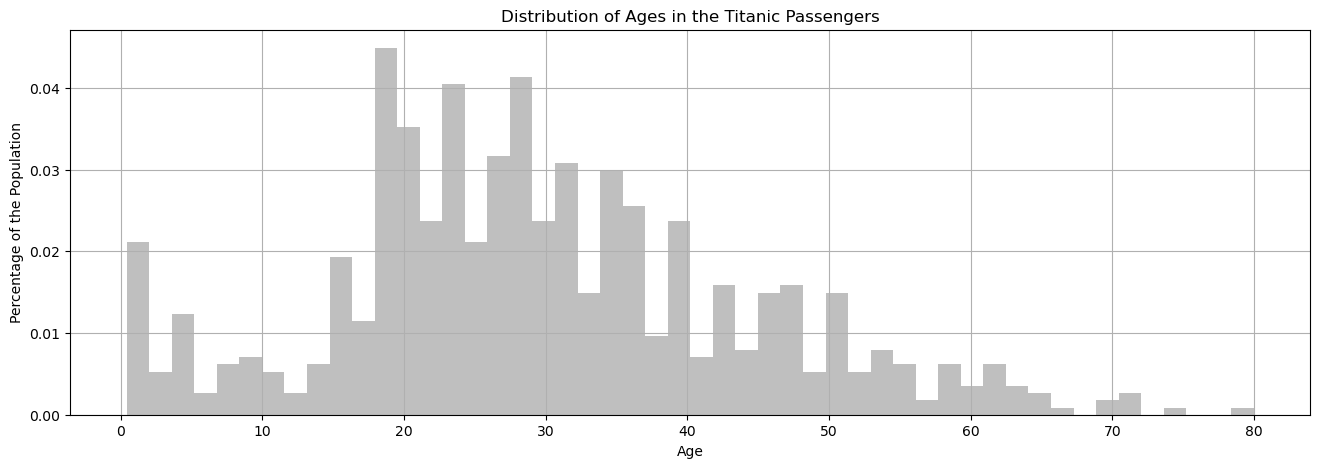

In [8]:
# Using Matplotlib
ages = train['Age'].dropna().tolist()

plt.figure(figsize=(16, 5))
plt.hist(ages, histtype='bar', bins=50, color='gray', 
            alpha=0.5, density=True)
plt.xlabel('Age')
plt.ylabel('Percentage of the Population')
plt.title('Distribution of Ages in the Titanic Passengers')
plt.grid(True)
plt.show()

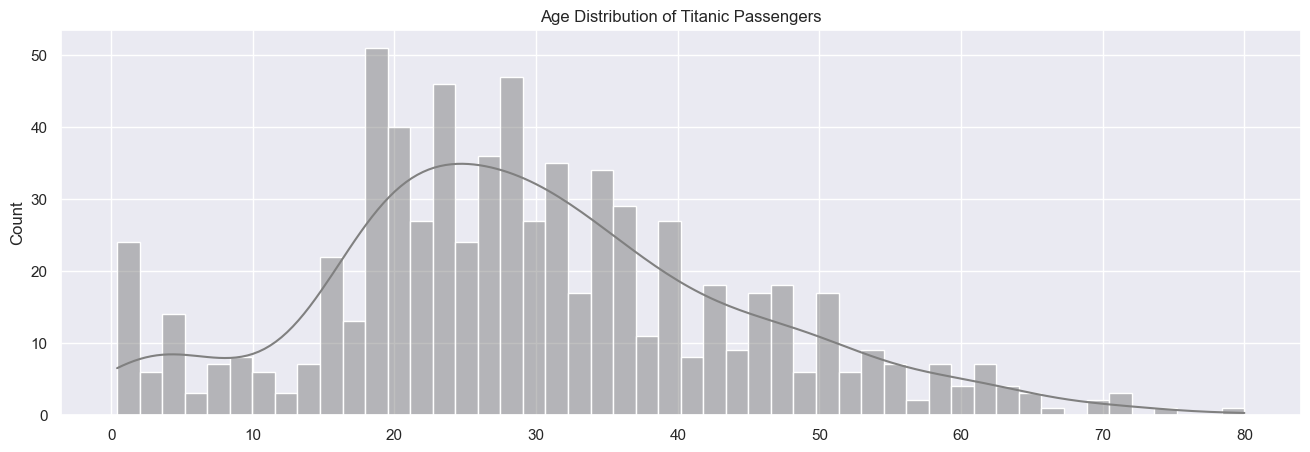

In [9]:
# Using Seaborn
sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(16, 5)})


g = sns.histplot(ages, bins=50, color='gray', kde=True)
g.set_title("Age Distribution of Titanic Passengers")
plt.show()

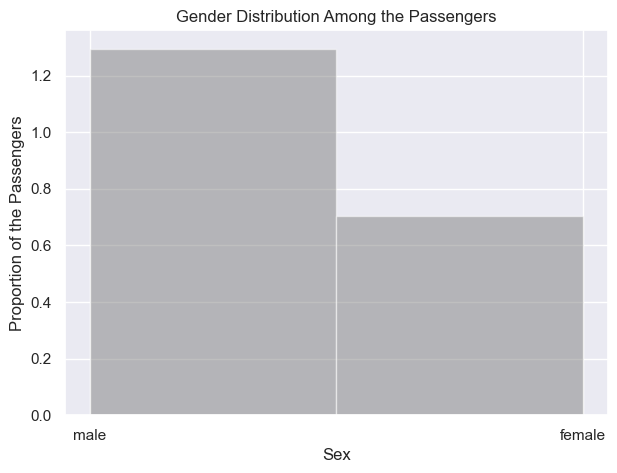

In [10]:
# Gender Distribution Among the Passengers
# Matplotlib

sex = train.loc[:, 'Sex'].dropna().tolist()
plt.figure(figsize=(7, 5))
plt.hist(sex, histtype='bar',bins=2, color='gray', alpha=0.5, density=True)
plt.xlabel('Sex')
plt.ylabel('Proportion of the Passengers')
plt.title('Gender Distribution Among the Passengers')
plt.grid(True)
plt.show()

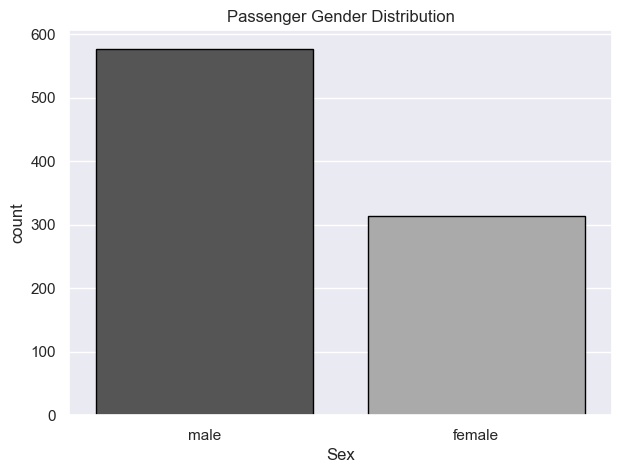

In [11]:
# Seaborn
sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(7, 5)})

g = sns.countplot(x='Sex', data=train, hue='Sex', palette='gray', edgecolor='black', legend=False)
g.set_title('Passenger Gender Distribution')
plt.show()

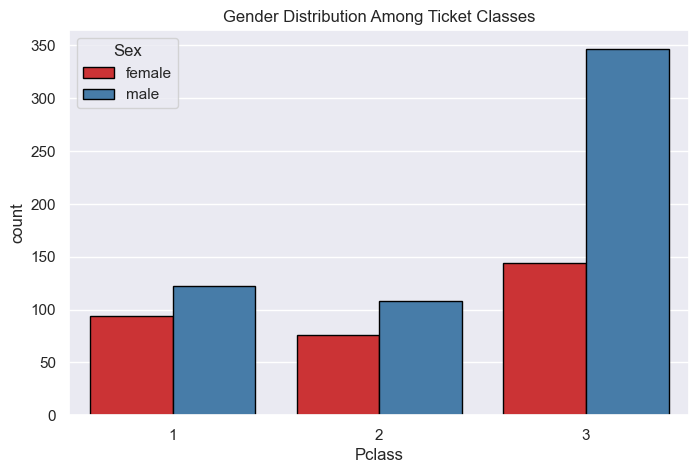

In [12]:
# Gender Distribution Among Ticket Classes
# Seaborn

sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(8, 5)})

g= sns.countplot(x='Pclass', data=train, hue='Sex', palette='Set1', edgecolor='black')
g.set_title('Gender Distribution Among Ticket Classes')
plt.show()

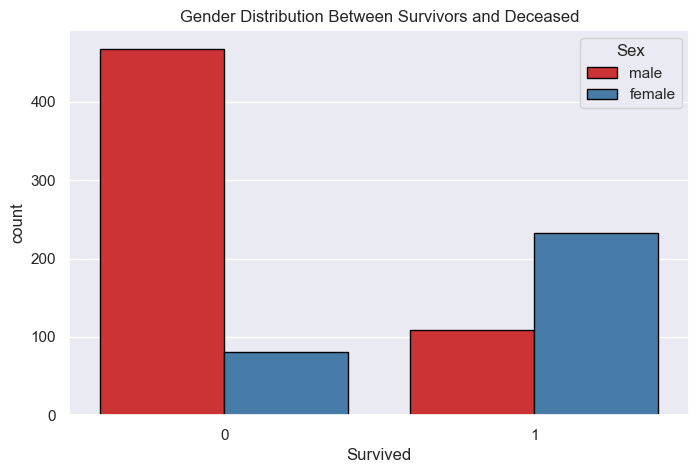

In [13]:
# Gender Distribution Between Survivors and Deceased
# Seaborn

sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x='Survived', data=train, hue='Sex', palette='Set1', edgecolor='black')
g.set_title('Gender Distribution Between Survivors and Deceased')
plt.show()

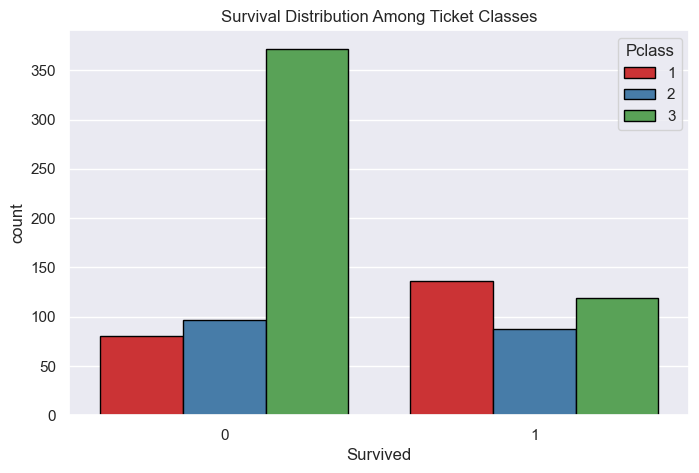

In [14]:
# Survival Distribution Among Ticket Classes
# Seaborn

sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x='Survived', data=train, hue='Pclass', palette='Set1', edgecolor='black')
g.set_title('Survival Distribution Among Ticket Classes')
plt.show()

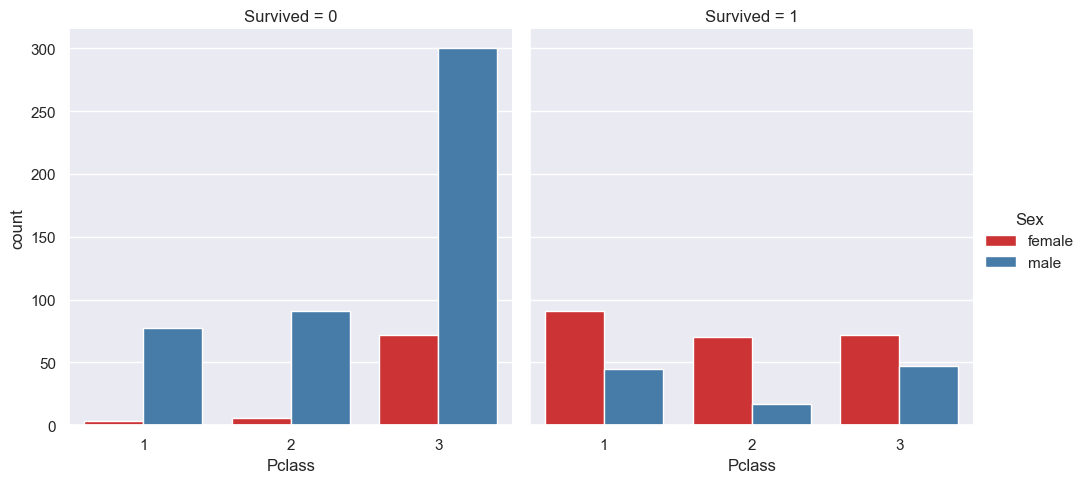

In [15]:
# Passanger Survival with respect to Gender and Ticket Class
# Seaborn

sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(12, 5)})
g = sns.catplot(x="Pclass", col="Survived", hue="Sex", data=train, kind="count", palette="Set1")
g.set_titles("Survived = {col_name}")
plt.show()

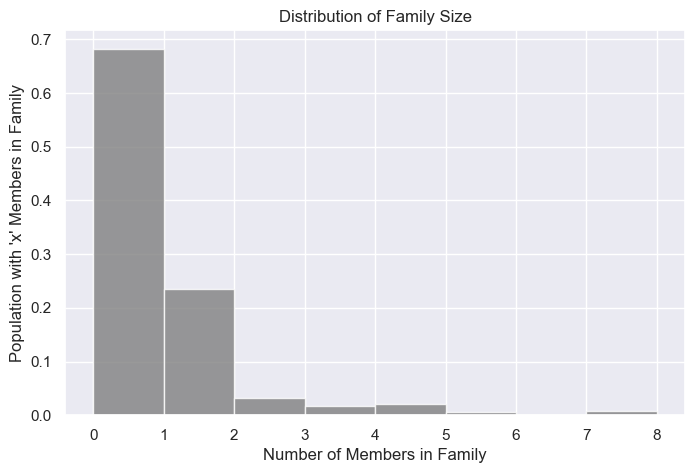

In [16]:
# Distribution of Family Size
# Matplotlib

Sibship = train['SibSp'].dropna().tolist()
plt.figure(figsize=(8, 5))
plt.hist(Sibship, histtype='bar', bins=8, color='gray', alpha=0.8, density=True)
plt.xlabel('Number of Members in Family')
plt.ylabel('Population with \'x\' Members in Family')
plt.title('Distribution of Family Size')
plt.grid(True)
plt.show()

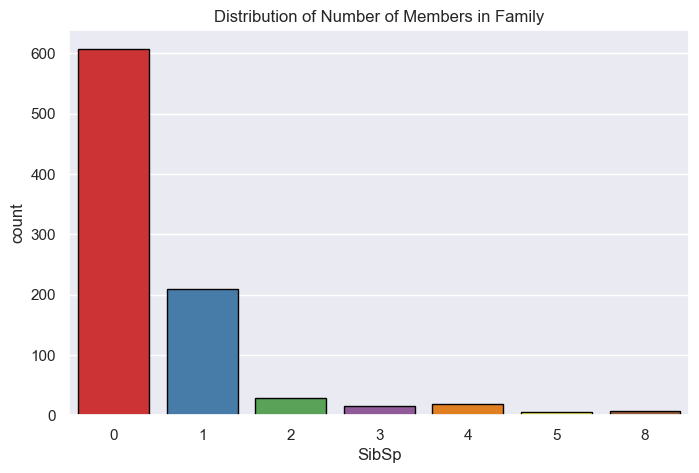

In [17]:
# Distribution of Family Size
# Seaborn

sns.set_theme(style='darkgrid')
sns.set_theme(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x="SibSp", data=train, palette='Set1', hue='SibSp', edgecolor='black', legend=False)
g.set_title("Distribution of Number of Members in Family")
plt.show()

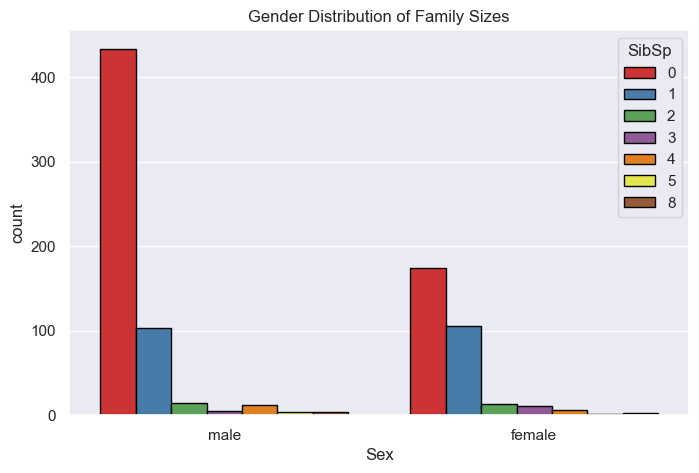

In [18]:
# Gender Distribution of Family Sizes
# Seaborn

sns.set_theme(style="darkgrid")
sns.set_theme(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x="Sex", hue=train["SibSp"].astype("category"), data=train, palette="Set1", edgecolor='black')
g.set_title("Gender Distribution of Family Sizes")
plt.show()


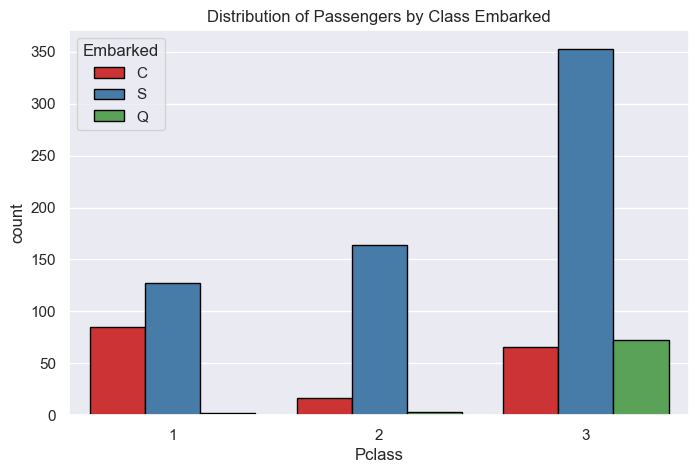

In [19]:
# Passanger Port Embarkment Data
# Seaborn

sns.set_theme(style='darkgrid')
sns.set_theme(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x="Pclass", data=train, palette='Set1', hue='Embarked', edgecolor='black')
g.set_title("Distribution of Passengers by Class Embarked")
plt.show()

#### Preprocessing

In [20]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
train['Name'].unique().tolist()

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [24]:
titles = ['Mrs', 'Mr', 'Don', 'Jonkheer', 'Master', 'Miss', 'Major', 
          'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mmme', 'Countess']

def get_title(name):
    for title in titles:
        if title in name:
            return title
    return 'None'

print(get_title('Johnson, Mrs. Oscar W (Elizabeth Vilhelmina Berg)'))
print(get_title('Williams, Mr. Charles Eugene'))

Mrs
Mr


In [25]:
train['Title'] = train['Name'].apply(lambda name: get_title(name))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [26]:
train['Age'].mean()

29.69911764705882

In [27]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.head()

C:\Users\Zoe Oladokun\AppData\Local\Temp\ipykernel_26276\2288245069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [32]:
x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y_train = train['Survived']

In [33]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [34]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
x_train = pd.get_dummies(x_train, drop_first=True, dtype=int)
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,...,Title_Jonkheer,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms,Title_None,Title_Rev
0,3,22.0,1,0,7.2500,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          889 non-null    int64  
 1   Age             889 non-null    float64
 2   SibSp           889 non-null    int64  
 3   Parch           889 non-null    int64  
 4   Fare            889 non-null    float64
 5   Sex_male        889 non-null    int32  
 6   Embarked_Q      889 non-null    int32  
 7   Embarked_S      889 non-null    int32  
 8   Title_Col       889 non-null    int32  
 9   Title_Countess  889 non-null    int32  
 10  Title_Don       889 non-null    int32  
 11  Title_Dr        889 non-null    int32  
 12  Title_Jonkheer  889 non-null    int32  
 13  Title_Major     889 non-null    int32  
 14  Title_Master    889 non-null    int32  
 15  Title_Miss      889 non-null    int32  
 16  Title_Mlle      889 non-null    int32  
 17  Title_Mr        889 non-null    int32  


#### Model Initialization, Training

In [37]:
 # Initializing the model
clf = RandomForestClassifier(max_depth=75, random_state=0)

#### Model Testing

In [38]:
# Preprocessing the Test Set
test['Title'] = test['Name'].apply(lambda name: get_title(name))
test['Age'] = test['Age'].fillna(test['Age'].mean())
test.drop('Cabin', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [40]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [41]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [42]:
x_test = pd.get_dummies(x_test, drop_first=True, dtype=int)
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Don,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,0


In [43]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Sex_male      418 non-null    int32  
 6   Embarked_Q    418 non-null    int32  
 7   Embarked_S    418 non-null    int32  
 8   Title_Don     418 non-null    int32  
 9   Title_Dr      418 non-null    int32  
 10  Title_Master  418 non-null    int32  
 11  Title_Miss    418 non-null    int32  
 12  Title_Mr      418 non-null    int32  
 13  Title_Mrs     418 non-null    int32  
 14  Title_Rev     418 non-null    int32  
dtypes: float64(2), int32(10), int64(3)
memory usage: 32.8 KB


In [44]:
total_titles = train['Title'].unique().tolist()
test_titles = test['Title'].unique().tolist()

for title in total_titles:
    if title not in test_titles:
        print(f'Title {title} not in test set')
        x_test['Title_' + str(title)] = 0

Title None not in test set
Title Ms not in test set
Title Major not in test set
Title Mlle not in test set
Title Capt not in test set
Title Countess not in test set
Title Jonkheer not in test set


In [45]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Don,Title_Dr,...,Title_Mr,Title_Mrs,Title_Rev,Title_None,Title_Ms,Title_Major,Title_Mlle,Title_Capt,Title_Countess,Title_Jonkheer
0,3,34.5,0,0,7.8292,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,62.0,0,0,9.6875,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
x_train, x_test = x_train.align(x_test, join="outer", axis=1, fill_value=0)

In [47]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=75, random_state=0)

In [48]:
survived = clf.predict(x_test)
survived

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Viewing the Sample Submission File

In [49]:
gender_submission = pd.read_csv("gender_submission.csv")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


#### Generating the Submission File

In [51]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': survived})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [52]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [53]:
output.to_csv("Submission_RandomForest.csv", index=False)